In [7]:
import pickle

catfile = r"C:\\Contents\\Kaggle\\dogs-cats-images\\dataset\test_set\\cat.pickle"
dogfile = r"C:\\Contents\\Kaggle\\dogs-cats-images\\dataset\test_set\\dog.pickle"

cats = pickle.load(open(catfile, 'rb'))
dogs = pickle.load(open(dogfile, 'rb'))



In [2]:
len(cats), type(cats)

(1000, dict)

In [3]:
cats[4001].shape

(415, 498, 3)

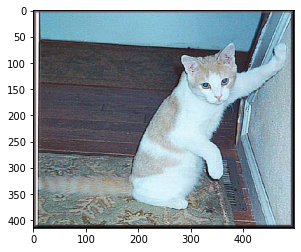

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


plt.imshow(cats[4001])

In [8]:
from PIL import Image
for k,v in cats.items():
    img = Image.fromarray(v)
    cats[k] = img.resize((64,64), Image.ANTIALIAS)

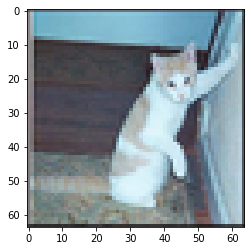

In [9]:


plt.imshow(cats[4001])

In [10]:
from PIL import Image
for k,v in dogs.items():
    img = Image.fromarray(v)
    dogs[k] = img.resize((64,64), Image.ANTIALIAS)

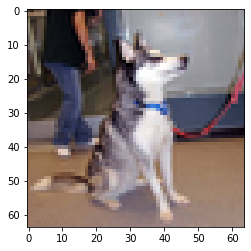

In [11]:


plt.imshow(dogs[4001])

In [12]:
from keras.preprocessing.image import img_to_array

cats = {k : img_to_array(v) for k,v in cats.items()}
dogs = {k : img_to_array(v) for k,v in dogs.items()}

Using TensorFlow backend.


In [13]:
X, Y = [], []

for c,d in zip(cats.values(), dogs.values()):
    tmp = c/255.0
    X.append(tmp)
    Y.append(1)
    
    tmp = d/255.0
    X.append(tmp)
    Y.append(0)

In [40]:
len(X)

2000

In [41]:
Y[:5]

[1, 0, 1, 0, 1]

In [14]:
X = np.array(X)


input_data_shape = X[0].shape
print(input_data_shape)

(64, 64, 3)


In [15]:
from sklearn.model_selection import train_test_split
split_test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=split_test_size, random_state = 42)


In [16]:

X_train[0].shape

(64, 64, 3)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape = input_data_shape, name = 'Input_Layer'))
model.add(Dense(4800, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(16, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 12288)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4800)              58987200  
_________________________________________________________________
dense_2 (Dense)              (None, 16)                76816     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 59,064,033
Trainable params: 59,064,033
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Train on 1400 samples, validate on 600 samples
Epoch 1/10
1400/1400 [==============================] - 25s 18ms/step - loss: 2.5061 - accuracy: 0.5129 - val_loss: 0.7414 - val_accuracy: 0.5550
Epoch 2/10
1400/1400 [==============================] - 24s 17ms/step - loss: 1.0537 - accuracy: 0.5286 - val_loss: 1.1335 - val_accuracy: 0.5067
Epoch 3/10
1400/1400 [==============================] - 25s 18ms/step - loss: 0.7564 - accuracy: 0.5671 - val_loss: 0.7371 - val_accuracy: 0.5250
Epoch 4/10
1400/1400 [==============================] - 25s 18ms/step - loss: 0.7834 - accuracy: 0.6057 - val_loss: 0.7076 - val_accuracy: 0.5583
Epoch 5/10
1400/1400 [==============================] - 24s 17ms/step - loss: 0.7258 - accuracy: 0.5957 - val_loss: 0.8187 - val_accuracy: 0.5317
Epoch 6/10
1400/1400 [==============================] - 24s 17ms/step - loss: 0.7030 - accuracy: 0.5986 - val_loss: 0.7234 - val_accuracy: 0.5400
Epoch 7/10
1400/1400 [==============================] - 26s 18ms/step - loss:

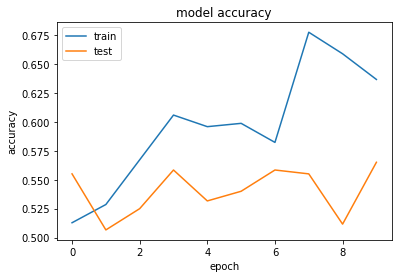

In [19]:
#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [26]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape = input_data_shape, name = 'Input_Layer'))
model.add(Dense(4800, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(128, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 12288)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 4800)              58987200  
_________________________________________________________________
dense_12 (Dense)             (None, 128)               614528    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 59,601,857
Trainable params: 59,601,857
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=50,validation_data=(X_test,y_test))

Train on 1400 samples, validate on 600 samples
Epoch 1/50
1400/1400 [==============================] - 25s 18ms/step - loss: 6.1400 - accuracy: 0.5014 - val_loss: 0.8337 - val_accuracy: 0.5683
Epoch 2/50
1400/1400 [==============================] - 25s 18ms/step - loss: 0.9589 - accuracy: 0.5493 - val_loss: 1.5917 - val_accuracy: 0.4950
Epoch 3/50
1400/1400 [==============================] - 25s 18ms/step - loss: 0.9346 - accuracy: 0.5829 - val_loss: 0.7211 - val_accuracy: 0.5650
Epoch 4/50
1400/1400 [==============================] - 26s 19ms/step - loss: 0.8824 - accuracy: 0.5707 - val_loss: 0.7227 - val_accuracy: 0.5683
Epoch 5/50
1400/1400 [==============================] - 28s 20ms/step - loss: 0.7873 - accuracy: 0.5857 - val_loss: 0.7456 - val_accuracy: 0.5717
Epoch 6/50
1400/1400 [==============================] - 25s 18ms/step - loss: 0.9329 - accuracy: 0.5786 - val_loss: 1.1004 - val_accuracy: 0.5050
Epoch 7/50
1400/1400 [==============================] - 25s 18ms/step - loss:

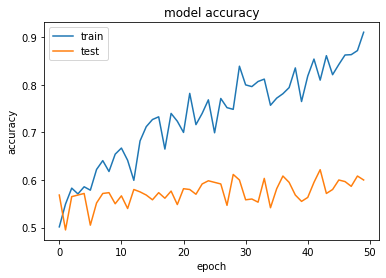

In [28]:
#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape = input_data_shape, name = 'Input_Layer'))
model.add(Dense(6400, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(256, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 12288)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 6400)              78649600  
_________________________________________________________________
dense_18 (Dense)             (None, 256)               1638656   
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 80,288,513
Trainable params: 80,288,513
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=40,validation_data=(X_test,y_test))

Train on 1400 samples, validate on 600 samples
Epoch 1/40
1400/1400 [==============================] - 56s 40ms/step - loss: 5.4265 - accuracy: 0.5057 - val_loss: 1.5253 - val_accuracy: 0.5183
Epoch 2/40
1400/1400 [==============================] - 40s 29ms/step - loss: 1.9403 - accuracy: 0.5300 - val_loss: 1.7697 - val_accuracy: 0.5167
Epoch 3/40
1400/1400 [==============================] - 40s 29ms/step - loss: 2.6590 - accuracy: 0.5036 - val_loss: 0.9241 - val_accuracy: 0.5650
Epoch 4/40
1400/1400 [==============================] - 40s 29ms/step - loss: 0.9230 - accuracy: 0.5843 - val_loss: 0.7516 - val_accuracy: 0.5567
Epoch 5/40
1400/1400 [==============================] - 40s 29ms/step - loss: 0.6963 - accuracy: 0.6193 - val_loss: 0.7242 - val_accuracy: 0.5550
Epoch 6/40
1400/1400 [==============================] - 40s 29ms/step - loss: 0.7280 - accuracy: 0.6421 - val_loss: 0.7489 - val_accuracy: 0.5683
Epoch 7/40
1400/1400 [==============================] - 40s 29ms/step - loss:

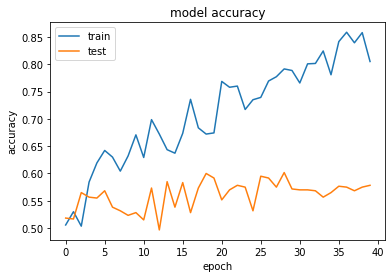

In [32]:
#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [37]:
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dense
from keras.layers import Flatten
from keras.applications.vgg16 import VGG16
from keras.models import Model

# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=input_data_shape)
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [38]:
model = define_model()

In [39]:
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_test,y_test))

Train on 1400 samples, validate on 600 samples
Epoch 1/20
1400/1400 [==============================] - 144s 103ms/step - loss: 0.6618 - accuracy: 0.6029 - val_loss: 0.5764 - val_accuracy: 0.7150
Epoch 2/20
1400/1400 [==============================] - 135s 96ms/step - loss: 0.5629 - accuracy: 0.7164 - val_loss: 0.5524 - val_accuracy: 0.7267
Epoch 3/20
1400/1400 [==============================] - 135s 96ms/step - loss: 0.5248 - accuracy: 0.7543 - val_loss: 0.5089 - val_accuracy: 0.7550
Epoch 4/20
1400/1400 [==============================] - 134s 96ms/step - loss: 0.5014 - accuracy: 0.7593 - val_loss: 0.4921 - val_accuracy: 0.7633
Epoch 5/20
1400/1400 [==============================] - 134s 96ms/step - loss: 0.4780 - accuracy: 0.7757 - val_loss: 0.4878 - val_accuracy: 0.7550
Epoch 6/20
1400/1400 [==============================] - 134s 96ms/step - loss: 0.4593 - accuracy: 0.7900 - val_loss: 0.4867 - val_accuracy: 0.7467
Epoch 7/20
1400/1400 [==============================] - 135s 97ms/step

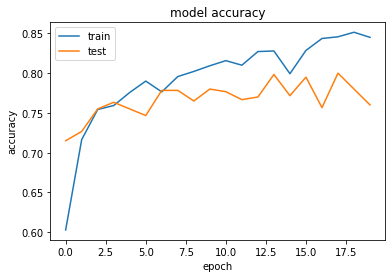

In [40]:
#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


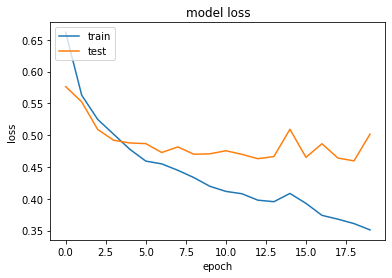

In [41]:
##Loss plot 
plt.plot(history.history[  'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()
